In [0]:
!pip install OpenNMT-py

In [0]:
!git clone https://github.com/OpenNMT/OpenNMT-py.git
!cd OpenNMT-py && python setup.py install

Cloning into 'OpenNMT-py'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 15960 (delta 4), reused 6 (delta 2), pack-reused 15941
Receiving objects: 100% (15960/15960), 146.74 MiB | 29.51 MiB/s, done.
Resolving deltas: 100% (11522/11522), done.
running install
running bdist_egg
running egg_info
creating OpenNMT_py.egg-info
writing OpenNMT_py.egg-info/PKG-INFO
writing dependency_links to OpenNMT_py.egg-info/dependency_links.txt
writing entry points to OpenNMT_py.egg-info/entry_points.txt
writing requirements to OpenNMT_py.egg-info/requires.txt
writing top-level names to OpenNMT_py.egg-info/top_level.txt
writing manifest file 'OpenNMT_py.egg-info/SOURCES.txt'
writing manifest file 'OpenNMT_py.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/onmt
copying onmt/__init__.py 

In [0]:
!unzip Corpora.zip

Archive:  Corpora.zip
   creating: Corpora/
   creating: Corpora/En2Fa-Translation/
   creating: Corpora/En2Fa-Translation/Dev/
  inflating: Corpora/En2Fa-Translation/Dev/dev.en  
  inflating: Corpora/En2Fa-Translation/Dev/dev.fa  
   creating: Corpora/En2Fa-Translation/Test/
  inflating: Corpora/En2Fa-Translation/Test/test.en  
  inflating: Corpora/En2Fa-Translation/Test/test.fa0  
  inflating: Corpora/En2Fa-Translation/Test/test.fa1  
  inflating: Corpora/En2Fa-Translation/Test/test.fa2  
  inflating: Corpora/En2Fa-Translation/Test/test.fa3  
   creating: Corpora/En2Fa-Translation/Train/
  inflating: Corpora/En2Fa-Translation/Train/train.en  
  inflating: Corpora/En2Fa-Translation/Train/train.fa  
   creating: Corpora/Transliteration/
  inflating: Corpora/Transliteration/dev.en  
  inflating: Corpora/Transliteration/dev.fa  
  inflating: Corpora/Transliteration/test.en  
  inflating: Corpora/Transliteration/test.fa  
  inflating: Corpora/Transliteration/train.en  
  inflating: Corpor

In [0]:
def charactrize(path) :
  t = open(path).read()
  t = t.replace(' ','<b>')
  t = ' '.join(t)
  t = t.replace('< b >','<b>')
  open(path+'.ch','w').write(t)

for f in ['dev','test','train'] :
  for ff in ['fa','en'] :
    charactrize('Corpora/Transliteration/{}.{}'.format(f,ff))

In [0]:
!onmt_preprocess -train_src Corpora/Transliteration/train.fa.ch -train_tgt Corpora/Transliteration/train.en.ch -valid_src Corpora/Transliteration/dev.fa.ch -valid_tgt Corpora/Transliteration/dev.en.ch -save_data ./demo

[2020-06-02 12:57:15,802 INFO] Extracting features...
[2020-06-02 12:57:15,802 INFO]  * number of source features: 0.
[2020-06-02 12:57:15,802 INFO]  * number of target features: 0.
[2020-06-02 12:57:15,803 INFO] Building `Fields` object...
[2020-06-02 12:57:15,803 INFO] Building & saving training data...
[2020-06-02 12:57:15,803 WARNING] Shards for corpus train already exist, won't be overwritten, pass the `-overwrite` option if you want to.
[2020-06-02 12:57:15,803 INFO] Building & saving validation data...
[2020-06-02 12:57:15,804 WARNING] Shards for corpus valid already exist, won't be overwritten, pass the `-overwrite` option if you want to.


In [0]:
!onmt_train -data demo -save_model demo-model -train_steps 10000 -save_checkpoint_steps 100 -valid_steps 1200 -world_size 1 -gpu_rank 0

[2020-06-02 13:16:07,595 INFO]  * src vocab size = 42
[2020-06-02 13:16:07,595 INFO]  * tgt vocab size = 34
[2020-06-02 13:16:07,595 INFO] Building model...
[2020-06-02 13:16:09,830 INFO] NMTModel(
  (encoder): RNNEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(42, 500, padding_idx=1)
        )
      )
    )
    (rnn): LSTM(500, 500, num_layers=2, dropout=0.3)
  )
  (decoder): InputFeedRNNDecoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(34, 500, padding_idx=1)
        )
      )
    )
    (dropout): Dropout(p=0.3, inplace=False)
    (rnn): StackedLSTM(
      (dropout): Dropout(p=0.3, inplace=False)
      (layers): ModuleList(
        (0): LSTMCell(1000, 500)
        (1): LSTMCell(500, 500)
      )
    )
    (attn): GlobalAttention(
      (linear_in): Linear(in_features=500, out_features=500, bias=False)
      (linear_out

In [2]:
!onmt_translate -model demo-model_step_10000.pt -src Corpora/Transliteration/test.fa.ch -output pred.txt -replace_unk -verbose

[2020-06-02 15:10:37,811 INFO] Translating shard 0.
/pytorch/aten/src/ATen/native/BinaryOps.cpp:66: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.

SENT 1: ['ن', 'ظ', 'ر', 'ت', '<b>', 'ب', 'ر', 'ا', 'م', '<b>', 'م', 'ه', 'م', 'ه']
PRED 1: n a z a r e t <b> b a r a a m <b> m o h e m m e
PRED SCORE: -0.0021

SENT 2: ['چ', 'و', 'ن', '<b>', 'د', 'و', 'س', 'ت', '<b>', 'ن', 'د', 'ا', 'ر', 'م', '<b>', 'د', 'ر', 'گ', 'ی', 'ر', '<b>', 'ا', 'ح', 'س', 'ا', 'س', 'ا', 'ت', '<b>', 'ب', 'ا', 'ش', 'ی', '<b>', 'و', '<b>', 'ت', 'ص', 'م', 'ی', 'م', '<b>', 'ب', 'گ', 'ی', 'ر', 'ی', '<b>', 'ن', 'م', 'ی', '\u200c', 'د', 'و', 'ن', 'م', '<b>', 'م', 'ن', 'ظ', 'و', 'ر', 'م', '<b>', 'ر', 'و', 'ش', 'ن', 'ه', '<b>', 'ی', 'ا', '<b>', 'ن', 'ه']
PRED 2: c h o n <b> d u s t <b> n a d a a r a m <b> d a r g i r <b> e <b> a h s a a s a a t <b> b a a s h i <b> o <b> t a s m 

In [4]:
!perl OpenNMT-py/tools/multi-bleu.perl Corpora/Transliteration/dev.en.ch < pred.txt

BLEU = 10.19, 73.8/41.5/16.4/5.9 (BP=0.437, ratio=0.547, hyp_len=58074, ref_len=106171)


In [7]:
from tqdm import tqdm

bleus = list()
for i in tqdm(range(100,10000+1,300)) :
  s = !onmt_translate -model demo-model_step_{i}.pt -src Corpora/Transliteration/dev.fa.ch -output pred.dev_{i}.txt -replace_unk -verbose
  f = !perl OpenNMT-py/tools/multi-bleu.perl Corpora/Transliteration/dev.en.ch < pred.dev_{i}.txt
  bleus.append(float(f[-1].split()[2][:-1]))




  0%|          | 0/34 [00:00<?, ?it/s]


  3%|▎         | 1/34 [00:52<28:56, 52.62s/it]


  6%|▌         | 2/34 [04:04<50:24, 94.52s/it]


  9%|▉         | 3/34 [07:17<1:03:59, 123.87s/it]


 12%|█▏        | 4/34 [10:24<1:11:22, 142.74s/it]


 15%|█▍        | 5/34 [13:08<1:12:11, 149.38s/it]


 18%|█▊        | 6/34 [15:56<1:12:17, 154.92s/it]


 21%|██        | 7/34 [18:43<1:11:16, 158.39s/it]


 24%|██▎       | 8/34 [21:35<1:10:23, 162.46s/it]


 26%|██▋       | 9/34 [24:24<1:08:32, 164.51s/it]


 29%|██▉       | 10/34 [27:15<1:06:38, 166.60s/it]


 32%|███▏      | 11/34 [30:03<1:03:57, 166.86s/it]


 35%|███▌      | 12/34 [32:51<1:01:18, 167.23s/it]


 38%|███▊      | 13/34 [35:38<58:31, 167.20s/it]  


 41%|████      | 14/34 [38:29<56:06, 168.34s/it]


 44%|████▍     | 15/34 [41:20<53:30, 168.99s/it]


 47%|████▋     | 16/34 [44:06<50:27, 168.22s/it]


 50%|█████     | 17/34 [46:58<48:00, 169.45s/it]


 53%|█████▎    | 18/34 [49:46<45:03, 168.99s/it]


 56%|█████▌    | 19/34 [52:

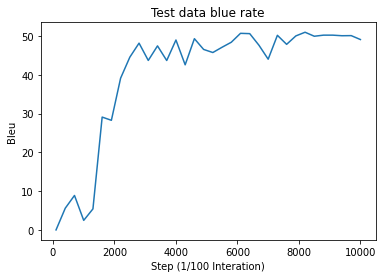

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(100,10000+1,300), bleus)
plt.title('Test data blue rate')
plt.ylabel('Bleu')
plt.xlabel('Step (1/100 Interation)')
plt.show()

In [0]:
1